**Merumuskan Masalah Dalam MACHINE LEARNING**

Masalah yang saya rumuskan pada model ini yaitu klasifikasi dan regresi, ada beberapa subtipe dari 2 masalah tersebut. Flowchart di bawah dapat menunjukkan bagaimana menentukan subtipe dari masalah klasifikasi dan regresi. Dengan flowchart ini, kita dapat lebih mudah mengkomunikasikan masalah ML kita dengan pengembang lain. 

Masalah tersebut terbagi menjadi :
A. Klasifikasi biner
B. Regresi satu dimensi
C. Klasifikasi banyak-kelas, label-tunggal
D. Klasifikasi banyak-kelas, banyak-label
E. Regresi multidimensi
F. Pengklasteran
G. Lainnya (penerjemahan, bounding box, dsb)

**Pendahuluan : Proses Membuat dan Melatih Model Neural Network dengan Tensorflow dan Keras**

Pada modul ini kita akan membahas lebih dalam lagi proses pembuatan model tersebut dan teknik-lain yang dapat diterapkan untuk meningkatkan performa model kita seperti:

A. Membuat plot akurasi dan loss dari model
B. Menggunakan Callback
C. Batch loading
E. Dropout

**Pra Pemrosesan Data untuk Model**

Secara umum, ada 4 tahapan yang perlu kita lakukan dalam memproses data yaitu:

A. Ubah dataset ke dalam bentuk larik. Yup, larik berisi angka-angka adalah format data yang dapat diterima oleh model kita. Masih ingat bukan, seperti pada kelas belajar machine learning untuk pemula, model kita menerima gambar sebagai matriks atau larik 2 dimensi.
B. Pisahkan atribut dan label pada data. Model kita akan mempelajari korelasi antara atribut dan label pada dataset kita.
Ubah skala data dalam skala yang seragam. Tahap ini sudah kita pelajari sebelumnya. Masih ingat? Nama teknik ini adalah normalization. Normalization dilakukan karena NN bekerja dengan baik memproses nilai yang berada di antara 0 dan 1.
C. Terakhir, pisahkan dataset ke dalam data latih dan data uji. Betul, kita memerlukan data uji untuk mengevaluasi kinerja dari model yang telah kita latih ya.

**Menggunakan Model Untuk Melakukan Prediksi**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [3]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Pada model sequential ini, kita kemudian isi layer yang kita inginkan untuk model kita. Untuk membuat sebuah layer, kita dapat menggunakan fungsi keras.layers.Dense().

Parameter units dari fungsi keras.layers.Dense() adalah jumlah perseptron yang dimiliki oleh layer tersebut. Yang perlu diperhatikan pada model sequential adalah, layer pertama dari model tersebut haruslah memiliki parameter input_shape agar model bisa mengenali bentuk input yang akan diprosesnya.
Parameter input_shape menunjukkan bentuk dari setiap elemen input yang akan diterima oleh model. Pada kasus kita setiap elemen dari data kita adalah sebuah bilangan numerik 1 digit, sehingga kita bisa isi input_shape kita dengan angka 1. Jika sebuah elemen dari dataset kita berupa gambar yang memiliki dimensi 32*32 piksel, maka input_shape yang sesuai adalah [32,32].

Kemudian hal yang paling penting adalah menentukan optimizer dan loss dari model agar model kita bisa belajar. Untuk menentukan optimizer dan loss kita gunakan fungsi compile. Untuk masalah regresi kita yang sederhana, kita dapat menggunakan stochastic gradient descent sebagai optimizer, dan mean squared error sebagai loss function model kita

In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Terakhir, yuk kita panggil fungsi yang paling terkenal dari machine learning yaitu fit(). **Fungsi fit()** adalah fungsi di mana kita menyuruh model kita untuk mempelajari hubungan antara atribut dan label pada dataset.

In [5]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 1s 523ms/step - loss: 51.8274
Epoch 2/150
1/1 [==============================] - 0s 10ms/step - loss: 24.2458
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 11.4783
Epoch 4/150
1/1 [==============================] - 0s 5ms/step - loss: 5.5673
Epoch 5/150
1/1 [==============================] - 0s 7ms/step - loss: 2.8296
Epoch 6/150
1/1 [==============================] - 0s 7ms/step - loss: 1.5607
Epoch 7/150
1/1 [==============================] - 0s 7ms/step - loss: 0.9716
Epoch 8/150
1/1 [==============================] - 0s 5ms/step - loss: 0.6971
Epoch 9/150
1/1 [==============================] - 0s 6ms/step - loss: 0.5683
Epoch 10/150
1/1 [==============================] - 0s 6ms/step - loss: 0.5069
Epoch 11/150
1/1 [==============================] - 0s 6ms/step - loss: 0.4767
Epoch 12/150
1/1 [==============================] - 0s 9ms/step - loss: 0.4609
Epoch 13/150
1/1 [==============================] - 0s 

Ketika model kita telah dilatih, kita kemudian dapat menggunakan model tersebut untuk memprediksi data yang belum pernah dilihatnya menggunakan fungsi predict. Ketika kita menjalankan kode di bawah, hasil yang kita dapat seharusnya adalah 22 dimana 2(10)+2=22

In [6]:
print(model.predict([10.0]))

[[23.229153]]


Menariknya, hasil yang didapat dari JST kita akan mendekati angka 22. Kenapa demikian? Karena JST menghitung probabilitas. Neural network tidak memprediksi kepastian melainkan probabilitas. Pada kasus kita neural network mempelajari bahwa pola yang terdapat pada dataset kemungkinan adalah 2X+2, namun ia juga belum pasti tentang hal itu. Sehingga prediksi yang dihasilkan adalah probabilitas hasilnya mendekati 22. Semakin banyak data yang kita berikan dan dan juga eror ketika training model semakin kecil, maka prediksi dari NN akan semakin mendekati 22

**Model Sekuensial dengan Beberapa Layer**

In [7]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])

**Membuat Model untuk Klasifikasi Dua Kelas**

Nah, pada Dataset ini kita akan coba melatih model untuk mengklasifikasikan apakah sebuah buah merupakan jeruk atau anggur.

In [9]:
import pandas as pd
df = pd.read_csv('citrus.csv')

Kemudian untuk melihat overview dari dataset kita bisa memanggil fungsi info() pada dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Selanjutnya gunakan fungsi head() untuk menampilkan dataframe kita. Pada output dari cell di bawah, label dari dataset adalah kolom pertama yang berisi string ‘orange’ dan ‘grapefruit’. 

In [11]:
df.head(10000)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


Selanjutnya mengubah nilai-nilai pada kolom name menjadi bilangan numerik. Untuk nilai yang berisi string ‘orange’ akan diubah menjadi 0 dan nilai yang berisi string ‘grapefruit’ akan diubah menjadi 1.

In [12]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sampai pada tahap ini model kita belum dapat memproses dataset ini karena dataset kita masih dalam bentuk dataframe. Betul, dataset harus dalam bentuk array agar dapat diproses oleh model. Nah untungnya kita dapat melakukan ini dengan mudah menggunakan atribut values dari dataframe. Values mengembalikan numpy array yang dikonversi dari dataframe.

In [14]:
dataset = df.values
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

In [15]:
#Memisahkan atribut dan label pada dataset

# pilih 5 kolom terakhir sebagai atribut
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

In [16]:
y = dataset[:,0]

In [17]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [18]:
#Memisahkan kembali data menjadi data latih dan data uji

# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [19]:
#Mengubah tipe data menjadi float 32

import numpy as np
 
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

Tahapan sudah selesai, saatnya membangun Model JST dari Dataset yang kita miliki

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(5,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [22]:
#Menampilkan akurasi dengan menambahkan parameter metriks dan mengisi dengan string "accuracy"

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 3s 3ms/step - loss: 0.6522 - accuracy: 0.8271
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.9087
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.9209
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.9247
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.9276
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9291
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9299
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9291
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9297
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1891 - accura

In [24]:
#Evaluasi model dengan fungsi evaluate

model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9237


[0.1853436678647995, 0.9236666560173035]

**Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas**

In [25]:
#Import library dari data yang kita masukkan

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [26]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
#Membuang kolom dengan fungsi drop()

df = df.drop(columns='Id')

In [28]:
#Memerlukan one hot encoding

category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [29]:
#Membuang kolom spesies 

new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [30]:
#Konversi datafram menjadi numpy array

dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [31]:
#Memisahkan atribut dan label

# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [32]:
#Menormalisasi data

# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [33]:
#Membagi data menjadi data latih dan data uji

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [34]:
#Arsitektur model menggunakan 3 layers

model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

In [35]:
#Menentukan optimzer loss dan function dari model

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#Memanggil fungsi fit()

hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0462 - accuracy: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0007 - accuracy: 0.5714
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9610 - accuracy: 0.6476
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9247 - accuracy: 0.6571
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8901 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6571
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8270 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7962 - accuracy: 0.6571
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7659 - accuracy: 0.6571
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7361 - accuracy: 0.6571
Epoch 11/100
4/4 [===========

In [37]:
#Melihat akurasi prediksi model dari dataset

model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1194 - accuracy: 0.9333


[0.11944723129272461, 0.9333333373069763]

**Plot Loss dan Akurasi dari Trained Model**

In [38]:
#Import Library Matplotlib

import matplotlib.pyplot as plt

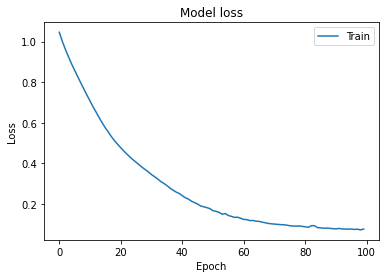

In [39]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

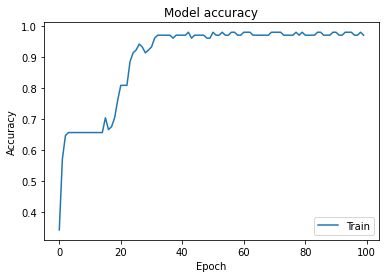

In [40]:
#Mengecek akurasi model stagnan pada epoch disekitar 20 dan diatas 80

plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

**Mencegah Overfitting dengan Dropout**

In [41]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                                           input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(6, activation='softmax')
])

**Penggunaan Callbacks**

In [42]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
#Menulis kode print(“\nAkurasi telah mencapai >90%!”)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [44]:
#Melihat parameter callbacks

model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 8ms/step - loss: 1.1134 - accuracy: 0.2952
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0603 - accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0114 - accuracy: 0.7048
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9718 - accuracy: 0.7048
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9363 - accuracy: 0.7048
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9021 - accuracy: 0.7048
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8659 - accuracy: 0.7048
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8310 - accuracy: 0.7048
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7962 - accuracy: 0.7048
Epoch 10/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7598 - accuracy: 0.7048
Epoch 11/50
4/4 [=====================

**Menggunakan Dataset dari tf.data.datasets**

In [45]:
#Import library Tensorflow

import tensorflow as tf
print(tf.__version__)

2.7.0


In [46]:
#Memasukkan fungsi tf.keras.dataset

mnist = tf.keras.datasets.mnist

In [47]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


5


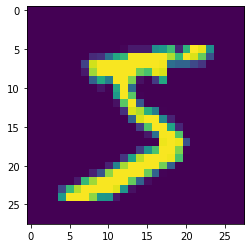

In [48]:
#Menampilkan label dari satu gambar 

import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [49]:
#Menormalisasi gambar

gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [50]:
#Memasukkan layer Flatten
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [51]:
#Menentukan optimizer dan loss
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2542 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1122 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0774 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0442 - accuracy: 0.9862


**Penggunaan Batch Loading**

In [52]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
#Memasukkan parameter batch size
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2601 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0770 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0581 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9854


In [54]:
#Mengubah batch size lebih besar
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0242 - accuracy: 0.9934
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0196 - accuracy: 0.9954
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0173 - accuracy: 0.9961
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0159 - accuracy: 0.9966
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0136 - accuracy: 0.9973


**Pendahuluan Sistem Rekomendasi**

Sistem rekomendasi sudah sangat sering kita jumpai sehari-hari, mulai dari membantu kita menemukan pekerjaan, restoran, film, berita, bahkan hingga jodoh seperti pada Tinder.
Materi yang akan dibahas
A. Apa itu sistem rekomendasi
B. Content bases filtering
C. Collaborative filtering
D. Sistem rekomendasi dengan jaringan saraf tiruan

**Membuat dan Melatih Model untuk Memproses Dataset Gambar dari Dunia Nyata**

In [55]:
#Memprediksi dataset chessman

!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-02-03 00:49:41--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-02-03 00:49:41--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   211MB/s    in 

In [56]:
#Ekstrak data dalam bentuk File Zip

import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [57]:
#Memanggil fungsi Listdir

os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Pawn', 'Bishop', 'Knight', 'Queen', 'King']

In [58]:
#Memasukkan augmentasi gambar

print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


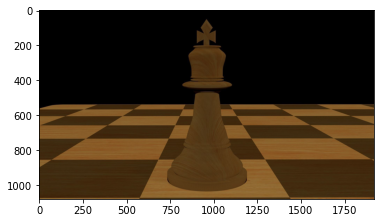

In [59]:
#Melihat gambar 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [60]:
#Import image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [61]:
#Menambahkan parameter subset dengan nilai training

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [62]:
#Membuat arsitektur model 

import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [63]:
#Menentukan optimizer dan loss

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [64]:
#Memanggil fungsi fit()

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 38s - loss: 1.9933 - accuracy: 0.1523 - val_loss: 1.7859 - val_accuracy: 0.2308 - 38s/epoch - 598ms/step
Epoch 2/50
63/63 - 37s - loss: 1.7880 - accuracy: 0.2004 - val_loss: 1.7661 - val_accuracy: 0.2115 - 37s/epoch - 587ms/step
Epoch 3/50
63/63 - 36s - loss: 1.7683 - accuracy: 0.2265 - val_loss: 1.7495 - val_accuracy: 0.2692 - 36s/epoch - 571ms/step
Epoch 4/50
63/63 - 36s - loss: 1.7185 - accuracy: 0.2685 - val_loss: 1.8202 - val_accuracy: 0.2308 - 36s/epoch - 575ms/step
Epoch 5/50
63/63 - 36s - loss: 1.6984 - accuracy: 0.2565 - val_loss: 1.6970 - val_accuracy: 0.3077 - 36s/epoch - 570ms/step
Epoch 6/50
63/63 - 36s - loss: 1.6684 - accuracy: 0.3006 - val_loss: 1.7270 - val_accuracy: 0.3077 - 36s/epoch - 570ms/step
Epoch 7/50
63/63 - 36s - loss: 1.6138 - accuracy: 0.3367 - val_loss: 1.6468 - val_accuracy: 0.3269 - 36s/epoch - 575ms/step
Epoch 8/50
63/63 - 36s - loss: 1.6128 - accuracy: 0.3126 - val_loss: 1.7274 - val_accuracy: 0.3462 - 36s/epoch - 577ms/step
Epoch 9/

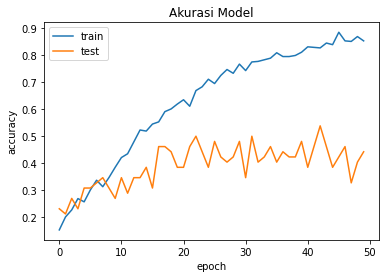

In [65]:
#Membuat plot akurasi

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

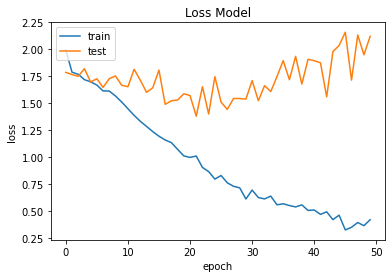

In [66]:
#Membuat plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Transfer Learning**

Ide dibalik transfer learning untuk masalah computer vision adalah, model yang telah dilatih pada dataset berukuran besar yang berisi gambar umum mampu dipakai sebagai model dasar yang membantu kita untuk mengenali fitur/bentuk-bentuk benda yang terdapat di dunia nyata.

Untuk melihat bagaimana efektifnya transfer learning, kita akan belajar menggunakan transfer learning pada dataset cheesman yang kita pelajari pada submodul sebelumnya.

Kode yang akan kita gunakan pada submodul ini hampir sama dengan kode pada latihan sebelumnya, jadi silahkan menyalin atau menggunakan kode pada latihan sebelumnya. 

In [67]:
#Unduh dataset cheesman

!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2022-02-03 01:41:15--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-02-03 01:41:15--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   213MB/s    in 

In [68]:
#Membuat direktori pada ImageDataGenerator

import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [69]:
#Membagi dataset menjadi data training dan data validasi

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [70]:
#Memanggil kelas ResNet152V2 dan mengisi parameter 

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234561536/234545216 [==============================] - 2s 0us/step


In [71]:
#Menentukan optimizer, loss, serta metrik

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [72]:
#Melakukan pelatihan model

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 143s - loss: 8.3740 - accuracy: 0.4810 - val_loss: 2.4056 - val_accuracy: 0.6538 - 143s/epoch - 2s/step
Epoch 2/50
63/63 - 127s - loss: 2.7100 - accuracy: 0.6453 - val_loss: 2.0449 - val_accuracy: 0.6154 - 127s/epoch - 2s/step
Epoch 3/50
63/63 - 125s - loss: 1.6729 - accuracy: 0.7455 - val_loss: 2.8690 - val_accuracy: 0.6731 - 125s/epoch - 2s/step
Epoch 4/50
63/63 - 125s - loss: 1.2953 - accuracy: 0.7575 - val_loss: 1.4160 - val_accuracy: 0.6923 - 125s/epoch - 2s/step
Epoch 5/50
63/63 - 125s - loss: 0.7687 - accuracy: 0.8196 - val_loss: 1.0243 - val_accuracy: 0.6923 - 125s/epoch - 2s/step
Epoch 6/50
63/63 - 126s - loss: 0.6505 - accuracy: 0.8317 - val_loss: 1.0735 - val_accuracy: 0.6731 - 126s/epoch - 2s/step
Epoch 7/50
63/63 - 127s - loss: 0.6302 - accuracy: 0.8537 - val_loss: 1.0318 - val_accuracy: 0.7308 - 127s/epoch - 2s/step
Epoch 8/50
63/63 - 125s - loss: 0.5964 - accuracy: 0.8477 - val_loss: 1.3906 - val_accuracy: 0.6346 - 125s/epoch - 2s/step
Epoch 9/50
63/63

**Style Transfer**

In [73]:
#Mengubah tensor menjadi gambar 

import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [74]:
#Mengubah gambar menjadi tensor

def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

In [75]:
#Konversi gambar yang di unduh

kucing_tensor = image_to_tensor('/content/kucing.jpg')
style_tensor = image_to_tensor('/content/style.jpg')

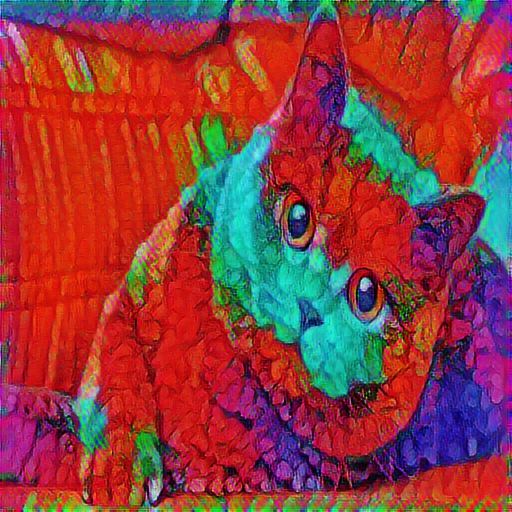

In [76]:
#Menampilkan hasil gambar pada style transfer

import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)

**Implementasi Natural Language Processing (NLP)**

Berbeda dengan pemrosesan gambar yang telah kita pelajari, pemrosesan teks memiliki tantangan tersendiri seperti perbedaan panjang teks, bahasa, serta bagaimana merepresentasikan teks ke dalam format yang dapat diterima oleh sebuah model.

Materi yang akan dibahas pada modul ini antara lain:

Penggunaan Tokenizer
Implementasi Embedding
Layer LSTM
Klasifikasi teks 2 kelas dan multi-kelas

**Latihan Tokenization**

In [77]:
#Import library

from tensorflow.keras.preprocessing.text import Tokenizer

In [78]:
#Menambahkan parameter OOV

tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [79]:
#Membuat teks yang akan di Tokenisasi

teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [80]:
#Memanggil fungsi fit_on_text()

tokenizer.fit_on_texts(teks)

In [81]:
#Mengubah teks dengan fungsi text_to_sequences

sequences = tokenizer.texts_to_sequences(teks)

In [82]:
#Melihat hasil Tokenisasi

print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [83]:
#Menggunakan fungsi OOV

print(tokenizer.texts_to_sequences(['Saya suka programming']))
print(tokenizer.texts_to_sequences(['Saya suka belajar programming sejak SMO']))

[[3, 4, 2]]
[[3, 4, 1, 2, 1, 1]]


In [84]:
#Menggunakan padding dengan library pad_sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

In [85]:
#Print sequence sama panjang

print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


In [86]:
#Mengatur parameter maxlen yang tidak lebih dari 5

sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

In [87]:
#Parameter truncating dan mengisi nilai post

sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

**Fungsi Embedding**

Pada klasifikasi teks, kita perlu melakukan embedding yang merupakan kunci dalam klasifikasi teks di Tensorflow. Embedding memungkinkan model ML untuk memahami makna di setiap kata dan mengelompokkan kata-kata dengan makna yang mirip agar berdekatan

In [90]:
#Memanggil fungsi flatten pada Embedding

import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [91]:
#Memanggil fungsi compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Binary Text Classification**

Untuk melihat data kali ini kita akan menggunakan dataset Yelp yang berisi review dari beberapa restoran di Amerika Serikat. Dataset terdiri dari 2 kelas yaitu 0 dan 1 yang menunjukkan apakah review tersebut positif atau negatif. 

In [95]:
#Import data

import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [96]:
#Melihat 5 sampel 

df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [97]:
#Membagi dataset menjadi train dan test set

from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [98]:
#Menggunakan fungsi pad_sequence

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [99]:
#Mengganti layer flatten dengan GlobalAveragePooling1D

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Long Short-Term Memory (LSTM) Layer**

Untuk mengimplementasikan LSTM sendiri sangatlah mudah pada Keras. Kita cukup menambahkan layer LSTM dan mengisi parameter dengan jumlah output yang diinginkan dari layer tersebut. Contoh penggunaan LSTM dapat dilihat pada kode di bawah. Kita dapat meletakkan layer LSTM setelah layer embedding dan sebelum Dense layer.

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

**Multiclass Text Classification**

Tujuan kita adalah menentukan genre sebuah film berdasarkan sinopsisnya. Namun sebelumnya dataset kita unduh melalui Kaggle

In [115]:
#Import data yang kita unduh

import pandas as pd
df = pd.read_csv('imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])

In [116]:
#Melihat data teratas 

df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [117]:
#Melakukan proses hot encoding

category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [118]:
#Mengubah tipe data menjadi tipe data Array

sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [119]:
#Membagi data training untuk jadi data testing

from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [120]:
#Mengkonversi sample menjadi data sequence

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [123]:
#Memanggil fungsi compile dan menentukan optimizer

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [124]:
#Melatih model dengan fungsi fit()

num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 19s - loss: 1.6107 - accuracy: 0.1828 - val_loss: 1.6091 - val_accuracy: 0.2040 - 19s/epoch - 729ms/step
Epoch 2/30
26/26 - 13s - loss: 1.6068 - accuracy: 0.2774 - val_loss: 1.6053 - val_accuracy: 0.2338 - 13s/epoch - 512ms/step
Epoch 3/30
26/26 - 13s - loss: 1.5661 - accuracy: 0.3047 - val_loss: 3.4373 - val_accuracy: 0.2338 - 13s/epoch - 511ms/step
Epoch 4/30
26/26 - 13s - loss: 1.5235 - accuracy: 0.3147 - val_loss: 1.5717 - val_accuracy: 0.2239 - 13s/epoch - 511ms/step
Epoch 5/30
26/26 - 13s - loss: 1.3029 - accuracy: 0.4540 - val_loss: 1.5748 - val_accuracy: 0.3284 - 13s/epoch - 511ms/step
Epoch 6/30
26/26 - 13s - loss: 1.0775 - accuracy: 0.5585 - val_loss: 1.7098 - val_accuracy: 0.2537 - 13s/epoch - 514ms/step
Epoch 7/30
26/26 - 14s - loss: 0.8444 - accuracy: 0.6468 - val_loss: 2.0752 - val_accuracy: 0.2687 - 14s/epoch - 523ms/step
Epoch 8/30
26/26 - 14s - loss: 0.6051 - accuracy: 0.8022 - val_loss: 2.6580 - val_accuracy: 0.2836 - 14s/epoch - 528ms/step
Epoch 9/

**Time Series**

**Latihan Time Series dengan LSTM**

In [126]:
#Import data 

import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [127]:
#Menampilkan 5 data teratas

data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [128]:
#Mengecek nilai yang hilang

data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

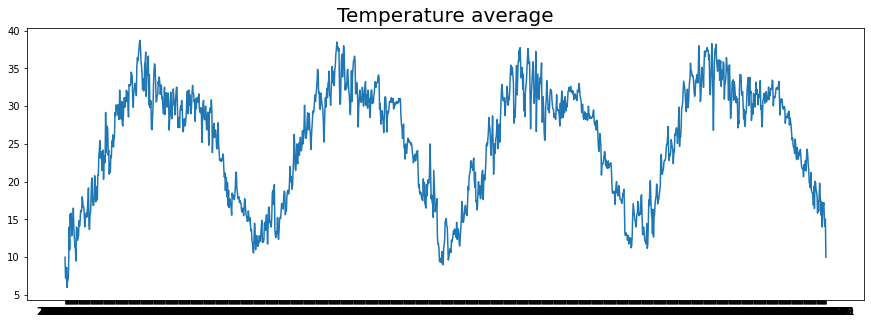

In [129]:
#Memanggil fungsi plot dari Library

dates = data_train['date'].values
temp  = data_train['meantemp'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [130]:
#Mengkonversi menjadi tipe numpy

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [131]:
#Menggunakan 2 model Layer LSTM

train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [132]:
#Evaluasi model MAE

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
15/15 [==============================] - 7s 117ms/step - loss: 25.7994 - mae: 26.2994
Epoch 2/100
15/15 [==============================] - 2s 113ms/step - loss: 25.6766 - mae: 26.1766
Epoch 3/100
15/15 [==============================] - 2s 112ms/step - loss: 25.6135 - mae: 26.1135
Epoch 4/100
15/15 [==============================] - 2s 114ms/step - loss: 25.5526 - mae: 26.0526
Epoch 5/100
15/15 [==============================] - 2s 112ms/step - loss: 25.4953 - mae: 25.9953
Epoch 6/100
15/15 [==============================] - 2s 112ms/step - loss: 25.4454 - mae: 25.9454
Epoch 7/100
15/15 [==============================] - 2s 112ms/step - loss: 25.4063 - mae: 25.9063
Epoch 8/100
15/15 [==============================] - 2s 114ms/step - loss: 25.3832 - mae: 25.8832
Epoch 9/100
15/15 [==============================] - 2s 114ms/step - loss: 25.3630 - mae: 25.8630
Epoch 10/100
15/15 [==============================] - 2s 111ms/step - loss: 25.3441 - mae: 25.8441
Epoch 11/100
15/15 

**Model Deployment**

In [151]:
def predict(data):
  data['is_good'] = data['rating'] > 3
  return model.predict(data)

**Format Penyimpanan Model**

In [133]:
#Format Save Mode

save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


**Format Penyimpanan ONNX**

In [144]:
#Install

!pip install onnxruntime
!pip install -U tf2onnx

     |████████████████████████████████| 4.9 MB 5.6 MB/s 
     |████████████████████████████████| 435 kB 5.5 MB/s 
     |████████████████████████████████| 12.7 MB 35.8 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [145]:
!python -m tf2onnx.convert --saved-model "saved_model" --output "model.onnx" --extra_opset ai.onnx.contrib:1

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-03 07:13:59,529 - WARNING - tensorflow_text not installed. Model will fail to load if tensorflow_text ops are used.
2022-02-03 07:13:59,549 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 633, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 236, in main
    use_graph_names=args.use_graph_names)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py", line 615, in from_saved_m